In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN", "NAME", "STATUS", "SPECIAL_CONSIDERATIONS"], axis=1, inplace=True)

print(application_df.shape)
application_df.head(10)

(34299, 8)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,Trust,0,5000,1
6,T3,Independent,C1000,Preservation,Trust,100000-499999,31452,1
7,T3,Independent,C2000,Preservation,Trust,10M-50M,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1-9999,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0


In [3]:
# Check the number of unique values in each column
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df.APPLICATION_TYPE.value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_counts[app_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
         ...  
C1267        2
C1234        2
C1256        2
C1246        2
C1580        1
C6100        1
C2190        1
C1236        1
C1283        1
C2600        1
C1900        1
C4200        1
C5200        1
C4120        1
C1370        1
C1248        1
C1820        1
C2570        1
C2561        1
C2500        1
C8210        1
C2150        1
C1570        1
C1245        1
C2170        1
C2380        1
C1728        1
C3700        1
C4500        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimization Attempt 1

Must be better than Loss: 0.8082101941108704, Accuracy: 0.4417492747306824

1. Add third hidden layer

In [51]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("../checkpoints/",exist_ok=True)

#saves every 5 minutes
checkpoint_path = "../checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

In [52]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 30

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 80)                3280      
_________________________________________________________________
dense_16 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_17 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 31        
Total params: 6,671
Trainable params: 6,671
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile the model
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [63]:
# Train the model
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "../models/model-{epoch:03d}",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    mode="auto",
)
fit_mod = nn1.fit(
    X_train, y_train, epochs=100, callbacks=[checkpoint], validation_split=0.2
)

Epoch 1/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
INFO:tensorflow:Assets written to: ../models\model-001\assets
Epoch 2/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6913 - val_accuracy: 0.5310
Epoch 3/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6913 - val_accuracy: 0.5310
Epoch 4/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6913 - val_accuracy: 0.5310
Epoch 5/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
INFO:tensorflow:Assets written to: ../models\model-005\assets
Epoch 6/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6910 - accuracy: 0.5324 - val_loss: 0.6913 - val_accuracy: 0.5310
Epoch 7/100
644/64

Epoch 57/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 58/100
644/644 [==============================] - 1s 986us/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 59/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 60/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 61/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 62/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 63/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accurac

In [64]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7325 - accuracy: 0.4482
Loss: 0.7324989438056946, Accuracy: 0.4481632709503174


In [65]:
nn1.save('AlphabetSoupCharity_Optimization1.h5')

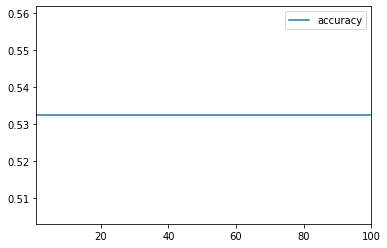

In [66]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_mod.history, index=range(1,len(fit_mod.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

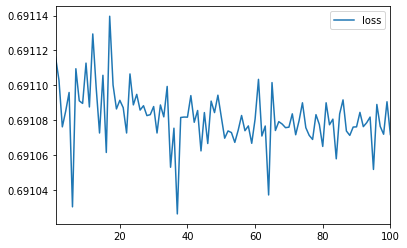

In [67]:
history_df.plot(y="loss")

## Optimization Attempt 2

1. Keep layer 3
2. Increase number of neurons
3. Change activation layer to "sigmoid"

In [75]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 50

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 100)               4100      
_________________________________________________________________
dense_24 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_25 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 51        
Total params: 11,751
Trainable params: 11,751
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [77]:
# Train the model
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "../models/model-{epoch:03d}",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    mode="auto",
)
fit_mod = nn2.fit(
    X_train, y_train, epochs=100, callbacks=[checkpoint], validation_split=0.2
)

Epoch 1/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5243 - val_loss: 0.6913 - val_accuracy: 0.5310
INFO:tensorflow:Assets written to: ../models\model-001\assets
Epoch 2/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
INFO:tensorflow:Assets written to: ../models\model-002\assets
Epoch 3/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6914 - accuracy: 0.5324 - val_loss: 0.6918 - val_accuracy: 0.5310
Epoch 4/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5324 - val_loss: 0.6913 - val_accuracy: 0.5310
Epoch 5/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5324 - val_loss: 0.6913 - val_accuracy: 0.5310
Epoch 6/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 7/100
644/64

Epoch 55/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 56/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 57/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 58/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6913 - val_accuracy: 0.5310
Epoch 59/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 60/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 61/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy:

In [78]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6977 - accuracy: 0.4876
Loss: 0.6977050304412842, Accuracy: 0.48758018016815186


In [79]:
nn2.save('AlphabetSoupCharity_Optimization2.h5')

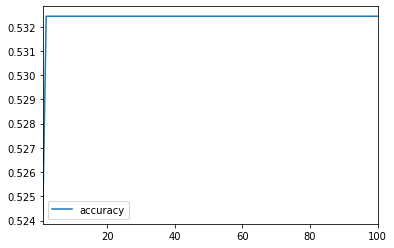

In [80]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_mod.history, index=range(1,len(fit_mod.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

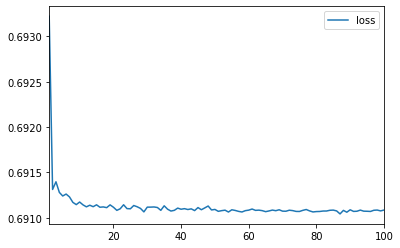

In [81]:
history_df.plot(y="loss")

## Optimization Attempt 3

1. Remove layer 3
2. Double number of neurons
3. Change activation layer to "relu"

In [82]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 100

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 200)               8200      
_________________________________________________________________
dense_28 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 101       
Total params: 28,401
Trainable params: 28,401
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [84]:
# Train the model
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "../models/model-{epoch:03d}",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    mode="auto",
)
fit_mod = nn3.fit(
    X_train, y_train, epochs=100, callbacks=[checkpoint], validation_split=0.2
)

Epoch 1/100
644/644 [==============================] - 1s 1ms/step - loss: 64093.6172 - accuracy: 0.4968 - val_loss: 103265.4219 - val_accuracy: 0.5310
INFO:tensorflow:Assets written to: ../models\model-001\assets
Epoch 2/100
644/644 [==============================] - 1s 1ms/step - loss: 89279.4531 - accuracy: 0.4962 - val_loss: 43848.1250 - val_accuracy: 0.4690
INFO:tensorflow:Assets written to: ../models\model-002\assets
Epoch 3/100
644/644 [==============================] - 1s 1ms/step - loss: 82317.1562 - accuracy: 0.4885 - val_loss: 120190.8906 - val_accuracy: 0.4690
Epoch 4/100
644/644 [==============================] - 1s 1ms/step - loss: 32854.5312 - accuracy: 0.4823 - val_loss: 28926.2148 - val_accuracy: 0.5310
INFO:tensorflow:Assets written to: ../models\model-004\assets
Epoch 5/100
644/644 [==============================] - 1s 1ms/step - loss: 17303.4668 - accuracy: 0.4979 - val_loss: 26892.7969 - val_accuracy: 0.4690
INFO:tensorflow:Assets written to: ../models\model-005\as

644/644 [==============================] - 1s 1ms/step - loss: 0.6914 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 54/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5313 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 55/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5324 - val_loss: 0.6913 - val_accuracy: 0.5310
Epoch 56/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5324 - val_loss: 0.6915 - val_accuracy: 0.5310
Epoch 57/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 58/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5318 - val_loss: 0.6955 - val_accuracy: 0.5310
Epoch 59/100
644/644 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 0.5324 - val_loss: 0.6918 - val_accuracy: 0.5310
Epoch

In [85]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6870 - accuracy: 0.5059
Loss: 0.6870083212852478, Accuracy: 0.5058892369270325


In [86]:
nn3.save('AlphabetSoupCharity_Optimization3.h5')

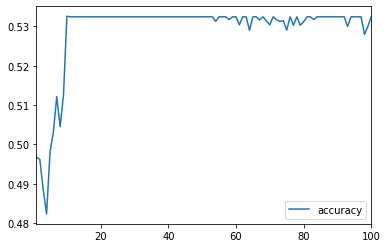

In [87]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_mod.history, index=range(1,len(fit_mod.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

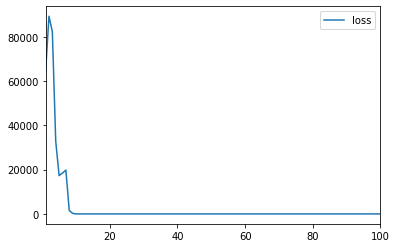

In [88]:
history_df.plot(y="loss")